# 作業  


### 用 digits (3個數字即可 , dataset.load_digits(n_class=3)) 資料嘗試跑 PCA

In [12]:
# 引用相關函式庫
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from sklearn import datasets, decomposition

%matplotlib inline

np.random.seed(5)

In [29]:
# 載入資料庫
digits = datasets.load_digits(n_class = 3)

x = digits.data
y = digits.target

In [30]:
# 設定模型估計參數
pca = decomposition.PCA(n_components = 3)

* [clf( )：Clear the current figure. ](https://matplotlib.org/3.1.0/api/_as_gen/matplotlib.pyplot.clf.html)
* [cla( )：Clear the current axes. ](https://matplotlib.org/3.1.0/api/_as_gen/matplotlib.pyplot.cla.html)

pyplot 的是一個畫布的概念，畫布上會有圖表。  
clf 是清空畫布、cla 是清空畫布上的圖表。  
另外有幾個方法也可以順手看看：glf、gla、close。

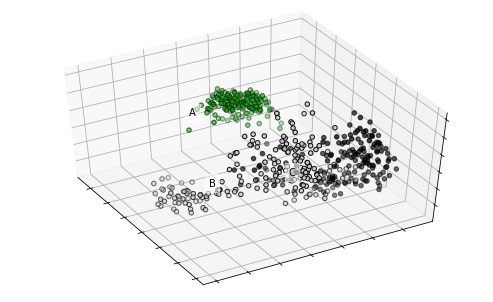

In [31]:
# 資料建模並視覺化結果
pca.fit(x)
x = pca.transform(x)

fig = plt.figure(1, figsize=(7, 4))
plt.clf() # Clear the current figure. 
ax = Axes3D(fig, rect=[0, 0, 0.95, 1], elev=48, azim=150)
plt.cla() # Clear the current axes. 

for name, label in [('A', 0), ('B', 1), ('C', 2)]:
    ax.text3D(x[y==label, 0].mean(),
              x[y==label, 1].mean() + 1.5, # 將 A,B,C類別的字體 向旁邊移動，方便看清楚不被資料蓋住
              x[y==label, 2].mean(), name,
              horizontalalignment='center',
              bbox=dict(alpha=.5, edgecolor='w', facecolor='w'))
    
# Reorder the labels to have colors matching the cluster results
y = np.choose(y, [1, 2, 0]).astype(np.float)
ax.scatter(x[:, 0], x[:, 1], x[:, 2], c=y, cmap=plt.cm.nipy_spectral,
           edgecolor='k')

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])

plt.show()